In [265]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM, MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, LSTM, Input 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import dgl
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import lime
import lime.lime_tabular
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Input, Softmax, Dot, Reshape, Layer
from math import pi
import shap


In [266]:
df = pd.read_csv('german_credit.csv')

## Data Structure

##There are a total of 21 attributes in the dataset. Their descriptions and details have been tabulated below:
- Status of existing checking account
- Duration in months
- Credit history
- Purpose
- Credit amount
- Savings account/bonds
- Present employment since
- Installment rate in percentage of disposable income
- Personal status and sex
- Other debtors/guarantors
- Present residence since
- Property
- Age in years
- Other installment plans
- Housing
- Number of existing credits at this bank
- Job
- Number of people being liable to provide maintenance for
- Telephone
- Foreign worker


In [267]:
df.describe()

,Creditability,Account_Balance,Duration_of_Credit_month,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_percent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [268]:
df.columns

Index(['Creditability', 'Account_Balance', 'Duration_of_Credit_month',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_percent', 'Sex_Marital_Status', 'Guarantors',
       'Duration_in_Current_address', 'Most_valuable_available_asset',
       'Age_years', 'Concurrent_Credits', 'Type_of_apartment',
       'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents',
       'Telephone', 'Foreign_Worker'],
      dtype='object')

In [269]:
df.head()

,Creditability,Account_Balance,Duration_of_Credit_month,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_percent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


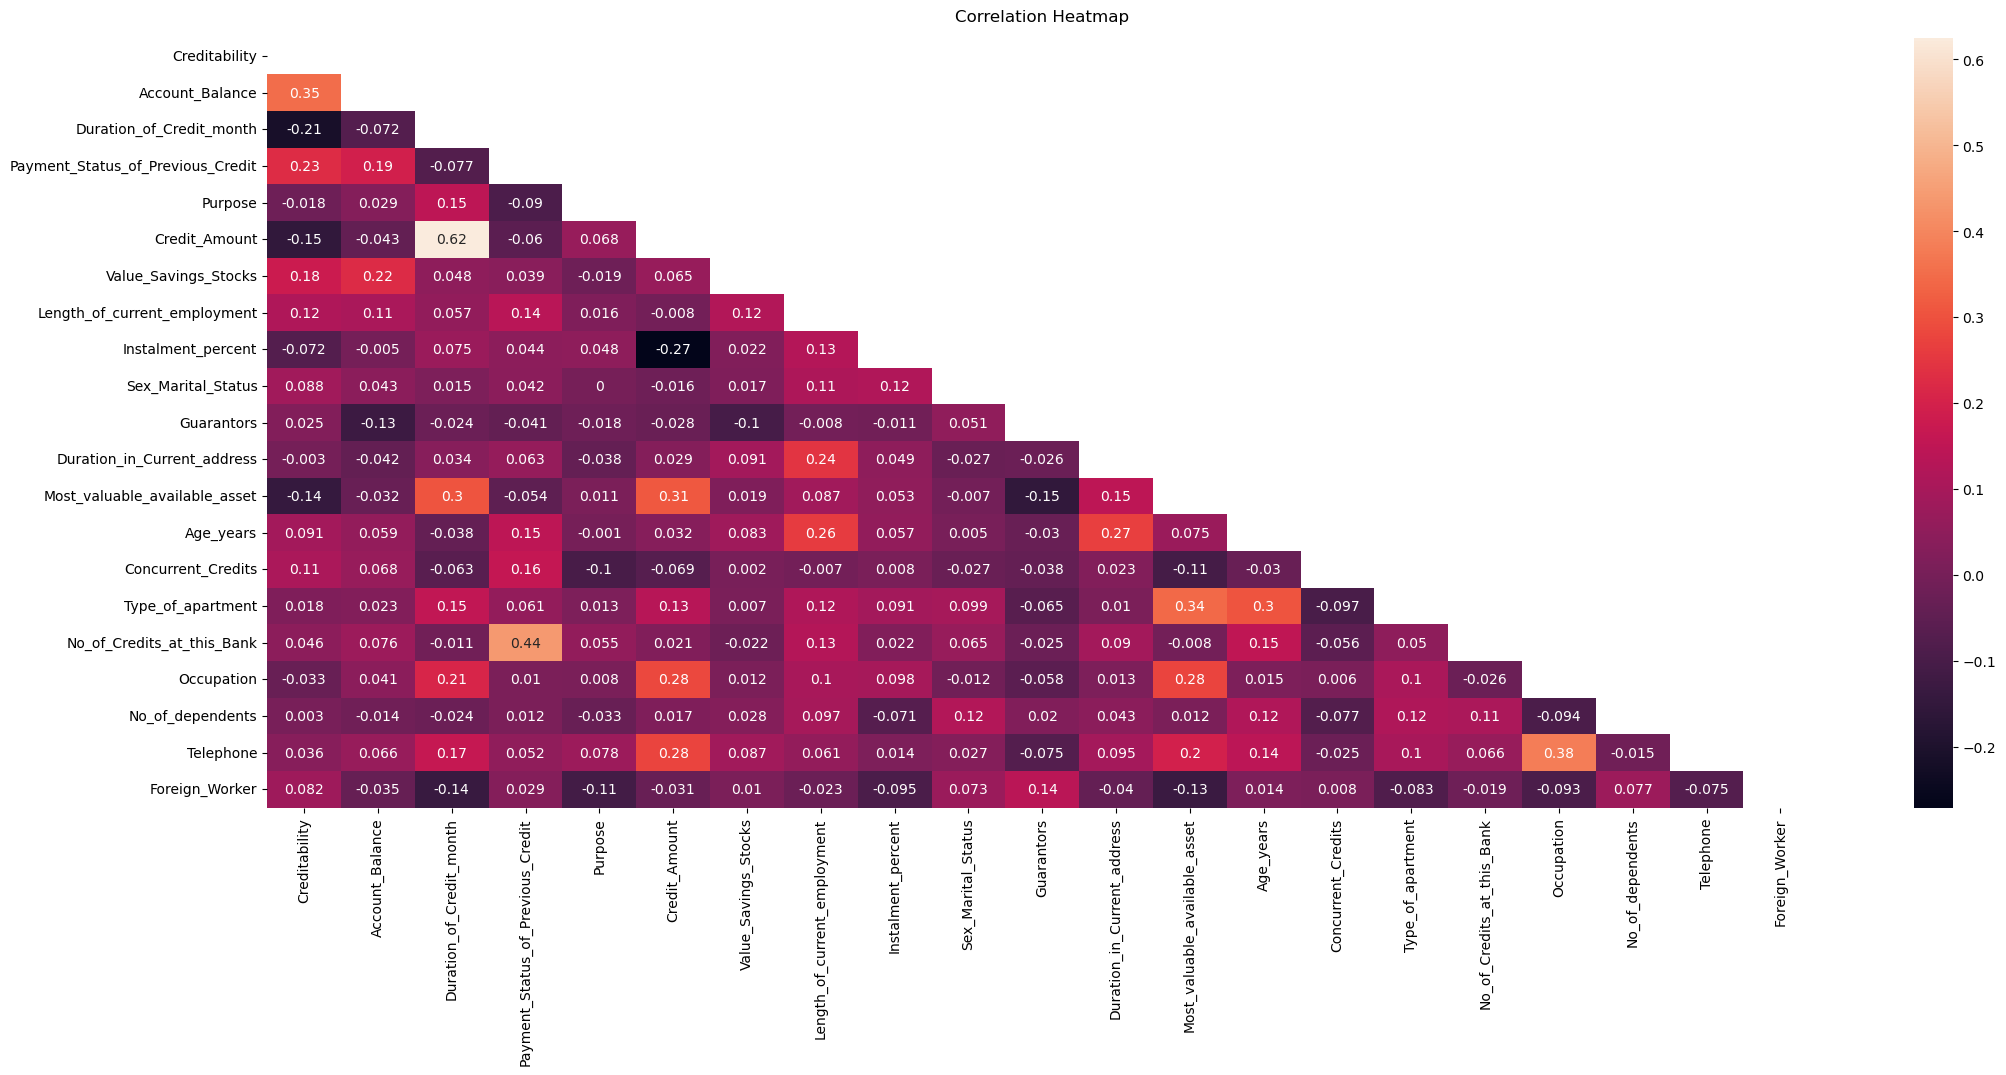

In [270]:
plt.figure(figsize=(25, 10))

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr().round(3),mask=mask, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

plt.show()


# Distribution of Creditability (target)

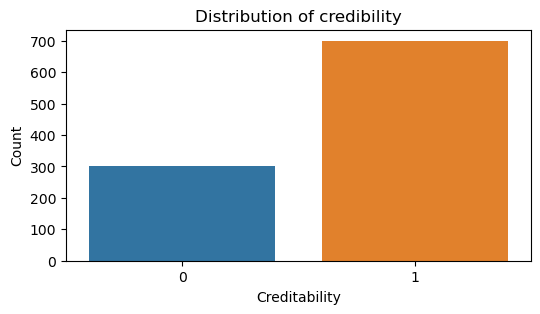

In [271]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Creditability')
plt.title('Distribution of credibility')
plt.xlabel('Creditability')
plt.ylabel('Count')
plt.show()

# Box plot for 'response' and 'duration'

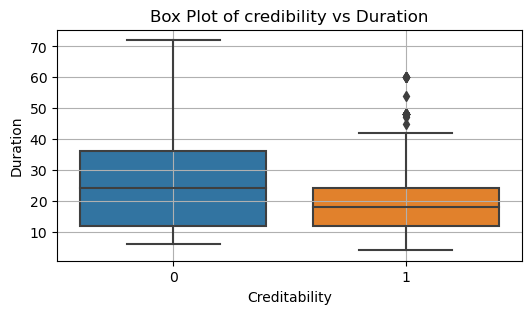

In [272]:
plt.figure(figsize=(6, 3))
sns.boxplot(data=df, x='Creditability', y='Duration_of_Credit_month')
plt.title('Box Plot of credibility vs Duration')
plt.xlabel('Creditability')
plt.ylabel('Duration')
plt.grid(True)
plt.show()

# installation rates by credibility

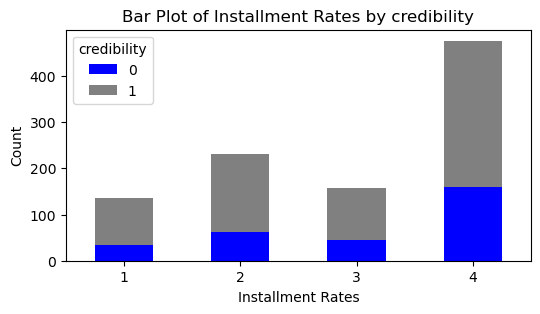

In [273]:
grouped = df.groupby(['Instalment_percent', 'Creditability']).size().unstack()

ax = grouped.plot(kind='bar', stacked=True, figsize=(6, 3), color=['blue', 'gray'])
plt.xlabel('Installment Rates')
plt.ylabel('Count')
plt.title('Bar Plot of Installment Rates by credibility')
plt.legend(title='credibility')
plt.xticks(rotation=0)
plt.show()

# Plotting the distribution of credit amount

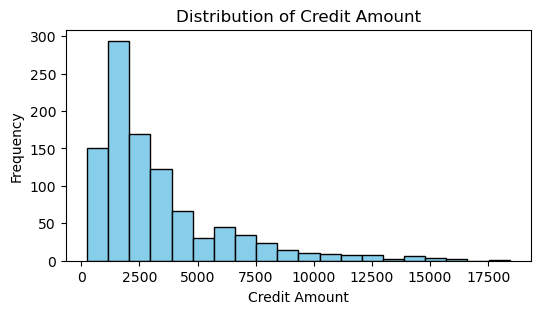

In [274]:
plt.figure(figsize=(6, 3))
plt.hist(df['Credit_Amount'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()


# Credit History Analysis

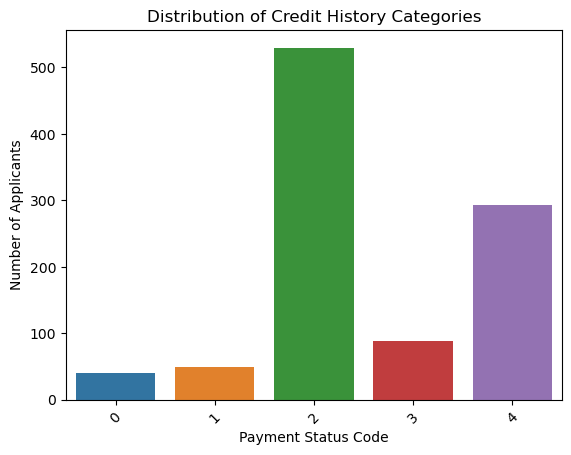

In [275]:
credit_history_counts = df["Payment_Status_of_Previous_Credit"].value_counts()
sns.barplot(x=credit_history_counts.index, y=credit_history_counts.values)
plt.title("Distribution of Credit History Categories")
plt.xlabel("Payment Status Code")
plt.ylabel("Number of Applicants")
plt.xticks(rotation=45) 
plt.show()

# Relationship between Duration and Credit Amount

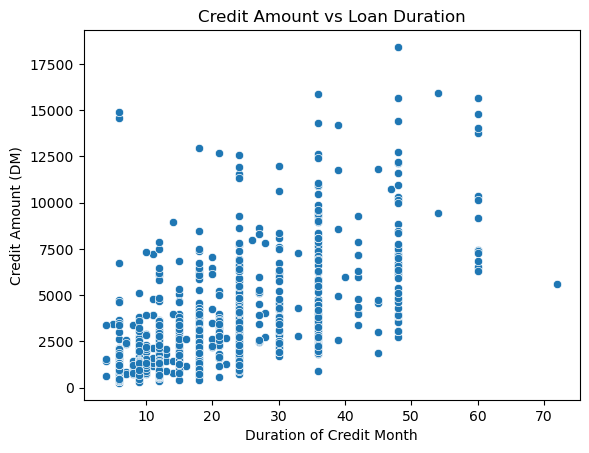

In [276]:
sns.scatterplot(x="Duration_of_Credit_month", y="Credit_Amount", data=df)  
plt.title("Credit Amount vs Loan Duration")
plt.xlabel("Duration of Credit Month")
plt.ylabel("Credit Amount (DM)")
plt.show()

# Age Distribution

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


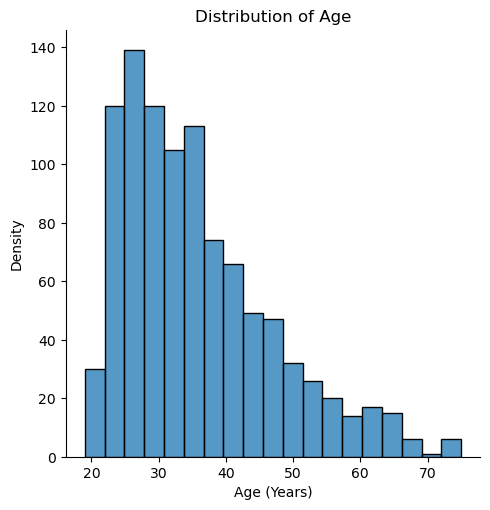

In [277]:
sns.displot(df["Age_years"])  
plt.title("Distribution of Age")
plt.xlabel("Age (Years)")
plt.ylabel("Density")
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are igno

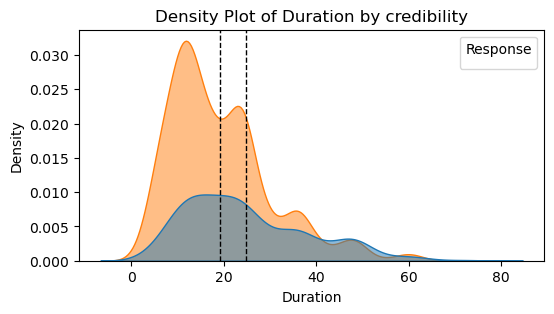

In [278]:

amount_mean = df.groupby('Creditability')['Credit_Amount'].mean().reset_index()
duration_mean = df.groupby('Creditability')['Duration_of_Credit_month'].mean().reset_index()

plt.figure(figsize=(6, 3))

sns.kdeplot(data=df, x='Duration_of_Credit_month', hue='Creditability', fill=True, alpha=0.5)

for _, row in duration_mean.iterrows():
    plt.axvline(x=row['Duration_of_Credit_month'], linestyle='--', color='black', linewidth=1)

plt.xlabel('Duration')
plt.ylabel('Density')
plt.title('Density Plot of Duration by credibility')
plt.legend(title='Response')
plt.show()


In [279]:
# credibility_label = {0: 'Bad Credit', 1: 'Good Credit'}
# df['credibility_label'] = df['Creditability'].map(credibility_label)


# plt.figure(figsize=(6, 4))
# sns.boxplot(x='credibility_label', y='Age_years', data=df, palette='Set2')
# plt.title('Box Plot of Age vs credibility')
# plt.xlabel('Creditability')
# plt.ylabel('Age (Years)')
# plt.show()


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


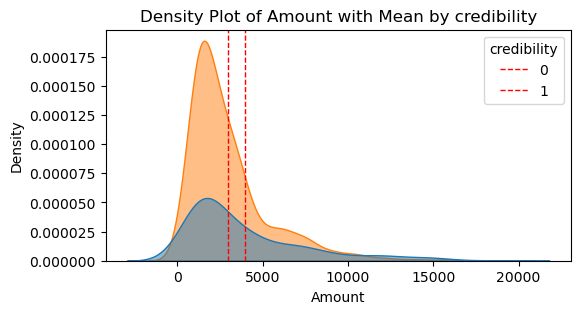

In [280]:
plt.figure(figsize=(6, 3))

sns.kdeplot(data=df, x='Credit_Amount', hue='Creditability', fill=True, alpha=0.5)

mean_amount = df.groupby('Creditability')['Credit_Amount'].mean()
for credibility, mean_value in mean_amount.items():
    plt.axvline(mean_value, color='r', linestyle='--', linewidth=1, label=credibility)

plt.legend(title='credibility')

plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Density Plot of Amount with Mean by credibility')

plt.show()


In [281]:
X = df.drop(columns=['Creditability'])  
y = df['Creditability'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dealing with data imbalanced

In [282]:
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.preprocessing import StandardScaler

def preprocess_data(X_train, y_train, X_test):
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_resampled)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, y_train_resampled, X_test_scaled

In [283]:
X_train_scaled, y_train_resampled, X_test_scaled = preprocess_data(X_train, y_train, X_test)

In [284]:
X_train_scaled, y_train_resampled, X_test_scaled = preprocess_data(X_train, y_train, X_test)

#  Model Development

## The LSTM model

In [285]:
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(1, X_train_reshaped.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

In [286]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train_resampled, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
36/36 [==============================] - 4s 5ms/step - loss: 0.6759 - accuracy: 0.7046
Epoch 2/10
36/36 [==============================] - 0s 6ms/step - loss: 0.5955 - accuracy: 0.7998
Epoch 3/10
36/36 [==============================] - 0s 6ms/step - loss: 0.4854 - accuracy: 0.8016
Epoch 4/10
36/36 [==============================] - 0s 6ms/step - loss: 0.4341 - accuracy: 0.8105
Epoch 5/10
36/36 [==============================] - 0s 5ms/step - loss: 0.4198 - accuracy: 0.8176
Epoch 6/10
36/36 [==============================] - 0s 6ms/step - loss: 0.4115 - accuracy: 0.8221
Epoch 7/10
36/36 [==============================] - 0s 6ms/step - loss: 0.4055 - accuracy: 0.8310
Epoch 8/10
36/36 [==============================] - 0s 6ms/step - loss: 0.3991 - accuracy: 0.8265
Epoch 9/10
36/36 [==============================] - 0s 6ms/step - loss: 0.3925 - accuracy: 0.8327
Epoch 10/10
36/36 [==============================] - 0s 6ms/step - loss: 0.3861 - accuracy: 0.8319


In [287]:
y_pred_proba = model.predict(X_test_reshaped)
y_pred = (y_pred_proba > 0.5).astype(int)

print(classification_report(y_test, y_pred))
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc.round(3))
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc.round(3))

7/7 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.59      0.66      0.63        62
           1       0.84      0.80      0.82       138

    accuracy                           0.76       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.76      0.76      0.76       200

Precision-Recall AUC: 0.879
ROC-AUC Score: 0.787


In [288]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("LSTM Confusion Matrix:")
print(conf_matrix)

LSTM Confusion Matrix:
[[ 41  21]
 [ 28 110]]


## The MLP nodel

In [289]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train_resampled)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [290]:
y_pred = mlp.predict(X_test_scaled)

y_pred_proba = mlp.predict_proba(X_test_scaled)[:, 1] 

print(classification_report(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc.round(3))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc.round(3))

              precision    recall  f1-score   support

           0       0.53      0.61      0.57        62
           1       0.81      0.75      0.78       138

    accuracy                           0.71       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.72      0.71      0.72       200

Precision-Recall AUC: 0.863
ROC-AUC Score: 0.757


In [291]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("MLP Confusion Matrix:")
print(conf_matrix)

MLP Confusion Matrix:
[[ 38  24]
 [ 34 104]]


## The CNN model

In [292]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train_resampled, epochs=10, batch_size=64, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
18/18 [==============================] - 1s 16ms/step - loss: 0.6388 - accuracy: 0.6317 - val_loss: 0.6207 - val_accuracy: 0.6450
Epoch 2/10
18/18 [==============================] - 0s 9ms/step - loss: 0.5547 - accuracy: 0.7198 - val_loss: 0.6056 - val_accuracy: 0.6850
Epoch 3/10
18/18 [==============================] - 0s 9ms/step - loss: 0.5089 - accuracy: 0.7607 - val_loss: 0.5809 - val_accuracy: 0.7000
Epoch 4/10
18/18 [==============================] - 0s 9ms/step - loss: 0.4822 - accuracy: 0.7794 - val_loss: 0.5663 - val_accuracy: 0.7200
Epoch 5/10
18/18 [==============================] - 0s 8ms/step - loss: 0.4640 - accuracy: 0.7945 - val_loss: 0.5565 - val_accuracy: 0.7300
Epoch 6/10
18/18 [==============================] - 0s 9ms/step - loss: 0.4445 - accuracy: 0.7927 - val_loss: 0.5612 - val_accuracy: 0.7300
Epoch 7/10
18/18 [==============================] - 0s 10ms/step - loss: 0.4358 - accuracy: 0.7963 - val_loss: 0.5452 - val_accuracy: 0.7550
Epoch 8/10
18/18 [

In [293]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_reshaped, y_train_resampled, epochs=10, batch_size=64, validation_data=(X_test_reshaped, y_test))

Epoch 1/10
18/18 [==============================] - 1s 14ms/step - loss: 0.6425 - accuracy: 0.6219 - val_loss: 0.6469 - val_accuracy: 0.6400
Epoch 2/10
18/18 [==============================] - 0s 8ms/step - loss: 0.5616 - accuracy: 0.7135 - val_loss: 0.6098 - val_accuracy: 0.6850
Epoch 3/10
18/18 [==============================] - 0s 9ms/step - loss: 0.5139 - accuracy: 0.7527 - val_loss: 0.5700 - val_accuracy: 0.7300
Epoch 4/10
18/18 [==============================] - 0s 9ms/step - loss: 0.4856 - accuracy: 0.7776 - val_loss: 0.5704 - val_accuracy: 0.7250
Epoch 5/10
18/18 [==============================] - 0s 9ms/step - loss: 0.4693 - accuracy: 0.7847 - val_loss: 0.6154 - val_accuracy: 0.6800
Epoch 6/10
18/18 [==============================] - 0s 9ms/step - loss: 0.4625 - accuracy: 0.7936 - val_loss: 0.6693 - val_accuracy: 0.6550
Epoch 7/10
18/18 [==============================] - 0s 9ms/step - loss: 0.4572 - accuracy: 0.7838 - val_loss: 0.6040 - val_accuracy: 0.6900
Epoch 8/10
18/18 [=

In [294]:
y_pred = (model.predict(X_test_reshaped) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

y_pred_proba = model.predict(X_test_reshaped).ravel()  # Predicted probabilities
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc.round(3))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc.round(3))

7/7 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.53      0.61      0.57        62
           1       0.81      0.75      0.78       138

    accuracy                           0.71       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.72      0.71      0.72       200

7/7 [==============================] - 0s 2ms/step
Precision-Recall AUC: 0.854
ROC-AUC Score: 0.763


In [295]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("CNN Confusion Matrix:")
print(conf_matrix)

CNN Confusion Matrix:
[[ 38  24]
 [ 34 104]]


## The RBM model

In [296]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression

X_train_binary = np.where(X_train_scaled > 0, 1, 0)
X_test_binary = np.where(X_test_scaled > 0, 1, 0)

rbm = BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=100, random_state=42, verbose=True)
logistic = LogisticRegression(max_iter=1000)

rbm_features_classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

X_train_bin, X_val_bin, y_train_bin, y_val_bin = train_test_split(X_train_binary, y_train_resampled, test_size=0.2, random_state=42)

rbm.fit(X_train_bin)

X_train_rbm_features = rbm.transform(X_train_bin)
X_val_rbm_features = rbm.transform(X_val_bin)

logistic.fit(X_train_rbm_features, y_train_bin)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -11.95, time = 0.03s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -11.98, time = 0.03s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -11.95, time = 0.01s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -11.95, time = 0.03s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -11.95, time = 0.05s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -11.99, time = 0.03s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -11.98, time = 0.03s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -11.95, time = 0.02s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -11.97, time = 0.01s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -11.92, time = 0.05s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -11.95, time = 0.02s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -11.98, time = 0.03s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -11.89, time = 0.05s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -11.94, time = 0.02s
[BernoulliRBM] Iteration 15, 

LogisticRegression(max_iter=1000)

In [297]:
X_test_rbm_features = rbm.transform(X_test_binary)

y_proba = logistic.predict_proba(X_test_rbm_features)[:, 1]
y_pred = logistic.predict(X_test_rbm_features)

print("Classification Report:")
print(classification_report(y_test, y_pred))

recall_auc = roc_auc_score(y_test, y_proba)
print("Recall AUC Score:", recall_auc.round(3))

precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc.round(3))

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.58      0.53        62
           1       0.79      0.72      0.75       138

    accuracy                           0.68       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.70      0.68      0.68       200

Recall AUC Score: 0.691
Precision-Recall AUC: 0.82


In [298]:
conf_matrix = confusion_matrix(y_test, y_pred)

print("RBM Confusion Matrix:")
print(conf_matrix)

RBM Confusion Matrix:
[[36 26]
 [39 99]]


## The GNN model

In [299]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [300]:
import torch.nn.functional as F

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.sigmoid(x)

input_dim = X_train_tensor.shape[1]
hidden_dim = 64  
output_dim = 1   

model = GNN(input_dim, hidden_dim, output_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)  
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.6880
Epoch [2/10], Loss: 0.6826
Epoch [3/10], Loss: 0.6773
Epoch [4/10], Loss: 0.6721
Epoch [5/10], Loss: 0.6670
Epoch [6/10], Loss: 0.6619
Epoch [7/10], Loss: 0.6570
Epoch [8/10], Loss: 0.6522
Epoch [9/10], Loss: 0.6474
Epoch [10/10], Loss: 0.6428


In [301]:
with torch.no_grad():
    model.eval()
    y_pred_proba = model(X_test_tensor).numpy()

y_pred_binary = (y_pred_proba > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc.round(3))

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc.round(3))

Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.66      0.51        62
           1       0.79      0.57      0.66       138

    accuracy                           0.60       200
   macro avg       0.60      0.62      0.59       200
weighted avg       0.67      0.60      0.61       200

ROC AUC Score: 0.623
Precision-Recall AUC: 0.779


In [302]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("GNN Confusion Matrix:")
print(conf_matrix)

GNN Confusion Matrix:
[[41 21]
 [59 79]]


## Autoencoder Model


In [305]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from keras.callbacks import EarlyStopping

X = df.drop(columns=['Creditability'])
y = df['Creditability']

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

X_processed = preprocessor.fit_transform(X)
y_encoded = y.values 

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

X_train_scaled, y_train_resampled, X_test_scaled = preprocess_data(X_train, y_train, X_test)

input_dim = X_train_scaled.shape[1]

input_data = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_data)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_data, decoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(
    X_train_scaled,
    X_train_scaled,
    epochs=24,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

encoder = Model(input_data, encoded)
encoded_train = encoder.predict(X_train_scaled)

encoded_input = Input(shape=(32,))
classifier_output = Dense(1, activation='sigmoid')(encoded_input) 
classifier_model = Model(encoded_input, classifier_output)
classifier_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier_model.fit(
    encoded_train,
    y_train_resampled,
    epochs=24,
    batch_size=256,
    shuffle=True,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
)

Epoch 1/24
4/4 [==============================] - 1s 47ms/step - loss: 1.3005 - val_loss: 1.1364
Epoch 2/24
4/4 [==============================] - 0s 18ms/step - loss: 1.2847 - val_loss: 1.1216
Epoch 3/24
4/4 [==============================] - 0s 17ms/step - loss: 1.2693 - val_loss: 1.1070
Epoch 4/24
4/4 [==============================] - 0s 19ms/step - loss: 1.2542 - val_loss: 1.0927
Epoch 5/24
4/4 [==============================] - 0s 15ms/step - loss: 1.2392 - val_loss: 1.0786
Epoch 6/24
4/4 [==============================] - 0s 14ms/step - loss: 1.2246 - val_loss: 1.0645
Epoch 7/24
4/4 [==============================] - 0s 21ms/step - loss: 1.2102 - val_loss: 1.0508
Epoch 8/24
4/4 [==============================] - 0s 21ms/step - loss: 1.1960 - val_loss: 1.0373
Epoch 9/24
4/4 [==============================] - 0s 22ms/step - loss: 1.1820 - val_loss: 1.0238
Epoch 10/24
4/4 [==============================] - 0s 20ms/step - loss: 1.1683 - val_loss: 1.0105
Epoch 11/24
4/4 [============

In [307]:
encoded_test = encoder.predict(X_test) 
y_pred_proba = classifier_model.predict(encoded_test).ravel()
y_pred = (y_pred_proba > 0.5).astype(int)

from sklearn.metrics import roc_auc_score, classification_report, auc, roc_curve, precision_recall_curve

report = classification_report(y_test, y_pred, target_names=['Bad Credit', 'Good Credit'])
print(report)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc.round(3))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", roc_auc.round(3))

7/7 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

  Bad Credit       0.26      0.47      0.34        62
 Good Credit       0.63      0.41      0.49       138

    accuracy                           0.42       200
   macro avg       0.45      0.44      0.41       200
weighted avg       0.52      0.42      0.44       200

Precision-Recall AUC: 0.652
ROC-AUC Score: 0.407


In [308]:
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("Autoencoder Confusion Matrix:")
print(conf_matrix)

Autoencoder Confusion Matrix:
[[41 21]
 [59 79]]


## Hybrid Model (MLP & RBM)

In [325]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=100, random_state=42, verbose=True)
logistic = LogisticRegression(max_iter=1000)
rbm_features_classifier = make_pipeline(rbm, logistic)

rbm_features_classifier.fit(X_train_scaled, y_train)

rbm_train_features = rbm_features_classifier.steps[0][1].transform(X_train_scaled)
rbm_test_features = rbm_features_classifier.steps[0][1].transform(X_test_scaled)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train)

mlp_train_pred = mlp.predict(X_train_scaled)
mlp_test_pred = mlp.predict(X_test_scaled)

X_train_hybrid = np.concatenate([X_train_scaled, rbm_train_features], axis=1)
X_test_hybrid = np.concatenate([X_test_scaled, rbm_test_features], axis=1)

mlp_hybrid = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, activation='relu', solver='adam', random_state=42)
mlp_hybrid.fit(X_train_hybrid, y_train)


hybrid_train_pred = mlp_hybrid.predict(X_train_hybrid)
hybrid_test_pred = mlp_hybrid.predict(X_test_hybrid)

precision_train_hybrid = precision_score(y_train, hybrid_train_pred, average='weighted')
recall_train_hybrid = recall_score(y_train, hybrid_train_pred, average='weighted')
f1_train_hybrid = f1_score(y_train, hybrid_train_pred, average='weighted')

precision_test_hybrid = precision_score(y_test, hybrid_test_pred, average='weighted')
recall_test_hybrid = recall_score(y_test, hybrid_test_pred, average='weighted')
f1_test_hybrid = f1_score(y_test, hybrid_test_pred, average='weighted')

[BernoulliRBM] Iteration 1, pseudo-likelihood = -28.36, time = 0.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -41.04, time = 0.03s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -54.11, time = 0.02s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -68.85, time = 0.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -84.92, time = 0.03s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -102.21, time = 0.03s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -120.92, time = 0.02s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -140.58, time = 0.03s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -161.55, time = 0.04s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -182.96, time = 0.04s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -204.96, time = 0.02s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -227.04, time = 0.03s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -249.71, time = 0.03s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -271.88, time = 0.03s
[BernoulliRBM] Itera

In [326]:
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

print("Classification Report (Hybrid Model):")
print(classification_report(y_test, hybrid_test_pred))

roc_auc = roc_auc_score(y_test, mlp_hybrid.predict_proba(X_test_hybrid)[:, 1])
print("ROC AUC (Hybrid Model):", roc_auc.round(3))

pr_auc = average_precision_score(y_test, mlp_hybrid.predict_proba(X_test_hybrid)[:, 1])
print("Precision-Recall AUC (Hybrid Model):", pr_auc.round(3))

Classification Report (Hybrid Model):
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        62
           1       0.80      0.80      0.80       138

    accuracy                           0.72       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.72      0.72      0.72       200

ROC AUC (Hybrid Model): 0.755
Precision-Recall AUC (Hybrid Model): 0.865


In [327]:
from sklearn.metrics import confusion_matrix

confusion_matrix_hybrid = confusion_matrix(y_test, hybrid_test_pred)

print("Confusion Matrix (Hybrid Model):")
print(confusion_matrix_hybrid)

Confusion Matrix (Hybrid Model):
[[ 34  28]
 [ 28 110]]


##  Hybrid (LSTM & CNN)

In [312]:
input_shape = (X_train_scaled.shape[1], 1)

Epoch 1/50
20/20 [==============================] - 5s 69ms/step - loss: 0.6338 - accuracy: 0.6938 - val_loss: 0.5850 - val_accuracy: 0.7312
Epoch 2/50
20/20 [==============================] - 0s 19ms/step - loss: 0.6203 - accuracy: 0.6953 - val_loss: 0.5871 - val_accuracy: 0.7312
Epoch 3/50
20/20 [==============================] - 0s 19ms/step - loss: 0.6118 - accuracy: 0.6953 - val_loss: 0.5793 - val_accuracy: 0.7312
Epoch 4/50
20/20 [==============================] - 0s 21ms/step - loss: 0.6119 - accuracy: 0.6953 - val_loss: 0.5744 - val_accuracy: 0.7312
Epoch 5/50
20/20 [==============================] - 0s 19ms/step - loss: 0.6060 - accuracy: 0.6953 - val_loss: 0.5700 - val_accuracy: 0.7312
Epoch 6/50
20/20 [==============================] - 0s 20ms/step - loss: 0.5895 - accuracy: 0.7016 - val_loss: 0.5643 - val_accuracy: 0.7312
Epoch 7/50
20/20 [==============================] - 0s 20ms/step - loss: 0.5807 - accuracy: 0.7016 - val_loss: 0.5467 - val_accuracy: 0.7375
Epoch 8/50
20

20/20 [==============================] - 0s 19ms/step - loss: 0.3866 - accuracy: 0.8172 - val_loss: 0.6336 - val_accuracy: 0.6938
Epoch 9/50
20/20 [==============================] - 0s 21ms/step - loss: 0.3382 - accuracy: 0.8484 - val_loss: 0.7202 - val_accuracy: 0.6875
Epoch 10/50
20/20 [==============================] - 0s 19ms/step - loss: 0.3355 - accuracy: 0.8562 - val_loss: 0.6819 - val_accuracy: 0.7250
Epoch 11/50
20/20 [==============================] - 0s 18ms/step - loss: 0.3104 - accuracy: 0.8734 - val_loss: 0.6794 - val_accuracy: 0.6938
Epoch 12/50
20/20 [==============================] - 0s 14ms/step - loss: 0.3119 - accuracy: 0.8703 - val_loss: 0.6658 - val_accuracy: 0.6938
Epoch 13/50
20/20 [==============================] - 0s 14ms/step - loss: 0.3000 - accuracy: 0.8719 - val_loss: 0.7794 - val_accuracy: 0.6750
Epoch 14/50
20/20 [==============================] - 0s 15ms/step - loss: 0.2930 - accuracy: 0.8766 - val_loss: 0.7387 - val_accuracy: 0.7125
Epoch 15/50
20/20 [

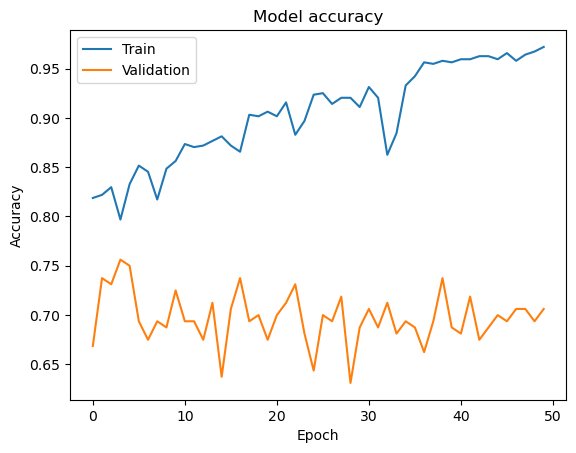

7/7 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.47      0.48      0.48        62
           1       0.76      0.75      0.76       138

    accuracy                           0.67       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.67      0.67      0.67       200

ROC AUC Score: 0.706
Precision-Recall AUC (PR AUC): 0.83


In [313]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, TimeDistributed, Flatten

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_shape[0], 1)))
model.add(MaxPooling1D(pool_size=2))

model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

probabilities = model.predict(X_test)

y_pred = (probabilities > 0.5).astype(int)

# Train the model and capture the history
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
probabilities = model.predict(X_test)
y_pred = (probabilities > 0.5).astype(int)

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, probabilities)
print("ROC AUC Score:", roc_auc.round(3))

pr_auc = average_precision_score(y_test, probabilities)
print("Precision-Recall AUC (PR AUC):", pr_auc.round(3))

In [314]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, TimeDistributed, Flatten
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_shape[0], 1)))
model.add(MaxPooling1D(pool_size=2))

model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

probabilities = model.predict(X_test)

y_pred = (probabilities > 0.5).astype(int)

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, probabilities)
print("ROC AUC Score:", roc_auc.round(3))

pr_auc = average_precision_score(y_test, probabilities)
print("Precision-Recall AUC (PR AUC):", pr_auc.round(3))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Epoch 1/50
20/20 [==============================] - 5s 67ms/step - loss: 0.6337 - accuracy: 0.6953 - val_loss: 0.5846 - val_accuracy: 0.7312
Epoch 2/50
20/20 [==============================] - 0s 20ms/step - loss: 0.6191 - accuracy: 0.6953 - val_loss: 0.5840 - val_accuracy: 0.7312
Epoch 3/50
20/20 [==============================] - 0s 18ms/step - loss: 0.6135 - accuracy: 0.6953 - val_loss: 0.5860 - val_accuracy: 0.7312
Epoch 4/50
20/20 [==============================] - 0s 20ms/step - loss: 0.6099 - accuracy: 0.6953 - val_loss: 0.5891 - val_accuracy: 0.7312
Epoch 5/50
20/20 [==============================] - 0s 20ms/step - loss: 0.6146 - accuracy: 0.7016 - val_loss: 0.5763 - val_accuracy: 0.7312
Epoch 6/50
20/20 [==============================] - 0s 18ms/step - loss: 0.6032 - accuracy: 0.7000 - val_loss: 0.5726 - val_accuracy: 0.7312
Epoch 7/50
20/20 [==============================] - 0s 18ms/step - loss: 0.5879 - accuracy: 0.7047 - val_loss: 0.5632 - val_accuracy: 0.6938
Epoch 8/50
20

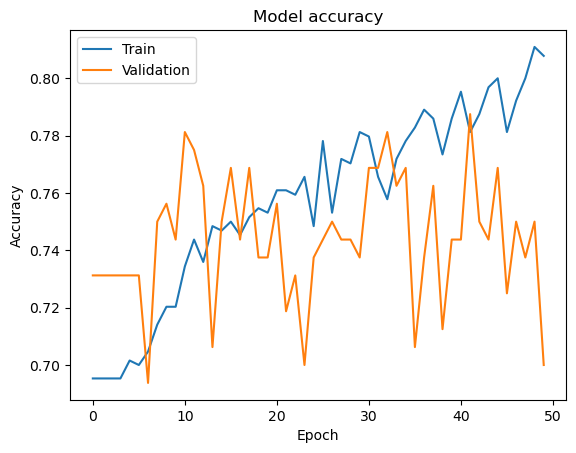

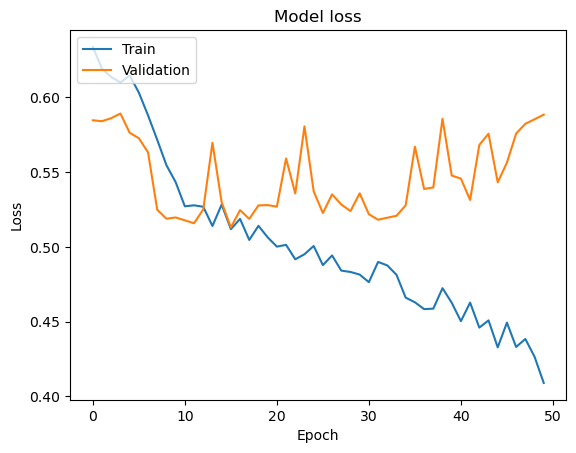

In [315]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Comparing model performance Metrics

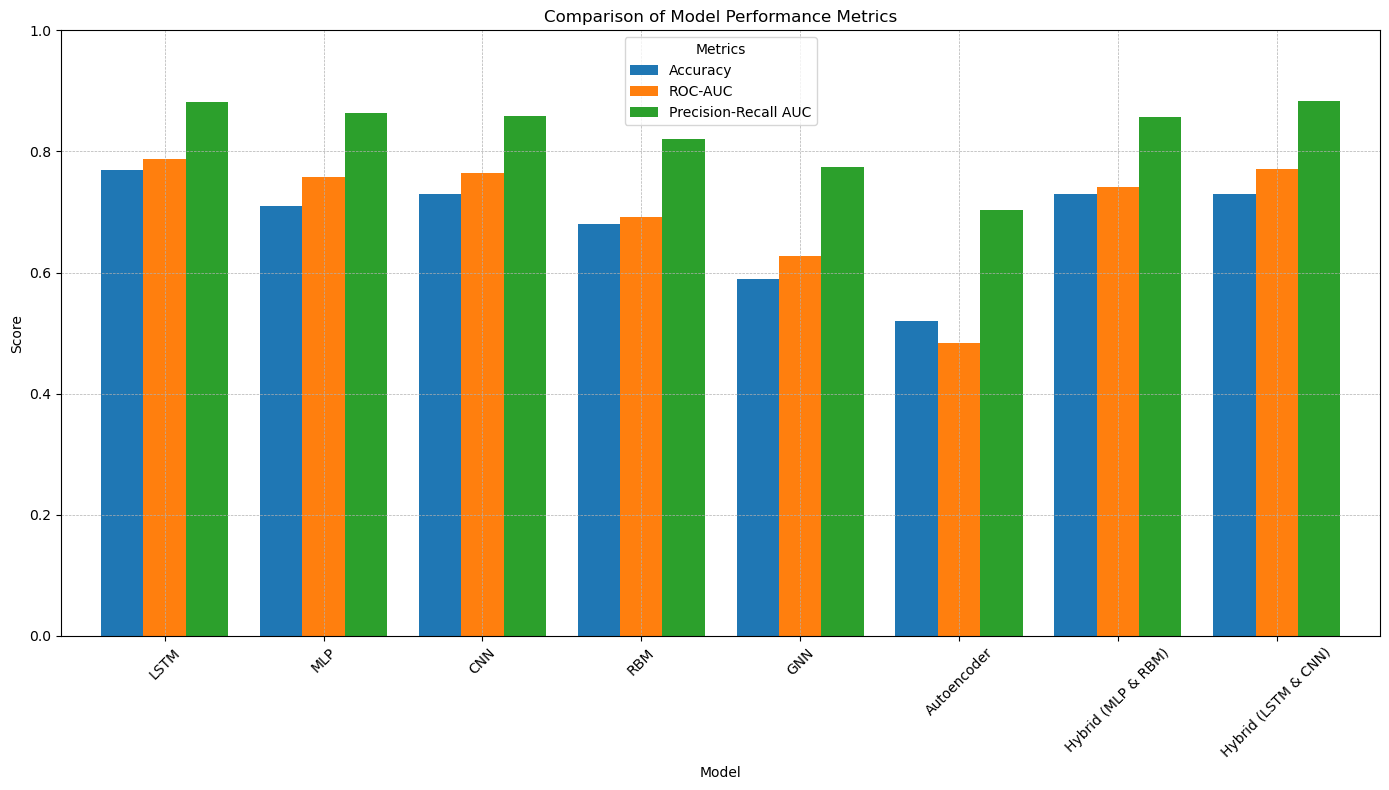

In [316]:
data = {
    'Model': ['LSTM', 'MLP', 'CNN', 'RBM', 'GNN', 'Autoencoder', 'Hybrid (MLP & RBM)', 'Hybrid (LSTM & CNN)'],
    'Accuracy': [0.77, 0.71, 0.73, 0.68, 0.59, 0.52, 0.73, 0.73],
    'ROC-AUC': [0.787, 0.757, 0.765, 0.691, 0.628, 0.483, 0.741, 0.771],
    'Precision-Recall AUC': [0.882, 0.863, 0.858, 0.82, 0.775, 0.703, 0.857, 0.883]
}

df = pd.DataFrame(data)

df.set_index('Model', inplace=True)

ax = df.plot.bar(rot=0, figsize=(14, 8), width=0.8)
ax.set_title('Comparison of Model Performance Metrics')
ax.set_ylabel('Score')
ax.set_ylim([0, 1])  
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Metrics')
plt.tight_layout() 

plt.show()

#  Application of XAI techniques to models

# CNN MODEL with SHAP XAI technique

Epoch 1/10
23/23 [==============================] - 1s 10ms/step - loss: 0.7198 - accuracy: 0.6722 - val_loss: 0.5368 - val_accuracy: 0.7250
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.5529 - accuracy: 0.7375 - val_loss: 0.5017 - val_accuracy: 0.7250
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.5074 - accuracy: 0.7667 - val_loss: 0.4580 - val_accuracy: 0.7625
Epoch 4/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4895 - accuracy: 0.7875 - val_loss: 0.4395 - val_accuracy: 0.7625
Epoch 5/10
23/23 [==============================] - 0s 6ms/step - loss: 0.4792 - accuracy: 0.7861 - val_loss: 0.4403 - val_accuracy: 0.7750
Epoch 6/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4739 - accuracy: 0.8000 - val_loss: 0.4428 - val_accuracy: 0.7625
Epoch 7/10
23/23 [==============================] - 0s 5ms/step - loss: 0.4621 - accuracy: 0.8028 - val_loss: 0.4456 - val_accuracy: 0.7750
Epoch 8/10
23/23 [=

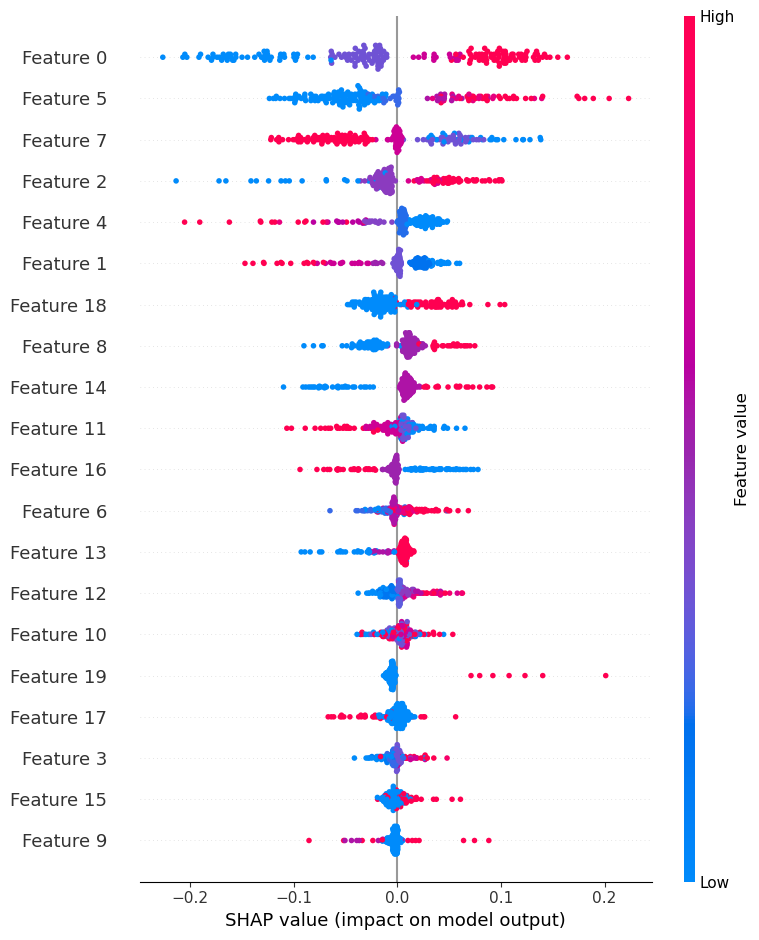

In [317]:
discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform', subsample=None)
X_binned = discretizer.fit_transform(X)

image_size = int(np.sqrt(X_binned.shape[1]))
X_images = X_binned.reshape(-1, 20) 

X_train, X_test, y_train, y_test = train_test_split(X_images, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(32, activation='relu', input_shape=(20,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


@tf.function
def compute_saliency_maps(images, model):
    with tf.GradientTape() as tape:
        tape.watch(images)
        logits = model(images)
        probs = tf.nn.softmax(logits, axis=-1)[:, 0]
    grads = tape.gradient(probs, images)
    saliency_maps = tf.reduce_max(tf.abs(grads), axis=-1)
    return saliency_maps

saliency_maps = compute_saliency_maps(X_train, model)


explainer = shap.Explainer(model, X_train)
shap_values = explainer.shap_values(X_test)


shap.summary_plot(shap_values, X_test)

# LSTM model with LRP XAI technique

Epoch 1/10
25/25 [==============================] - 2s 3ms/step - loss: 0.6827 - accuracy: 0.5938
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 0.6562 - accuracy: 0.7312
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.7638
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5911 - accuracy: 0.7625
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5523 - accuracy: 0.7700
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.5193 - accuracy: 0.7763
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4972 - accuracy: 0.7763
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: 0.4829 - accuracy: 0.7775
Epoch 9/10
25/25 [==============================] - 0s 5ms/step - loss: 0.4741 - accuracy: 0.7775
Epoch 10/10
7/7 [==============================] - 1s 2ms/step - loss: 0.5020 - accuracy: 0.7400
Test Loss: 0.50196444

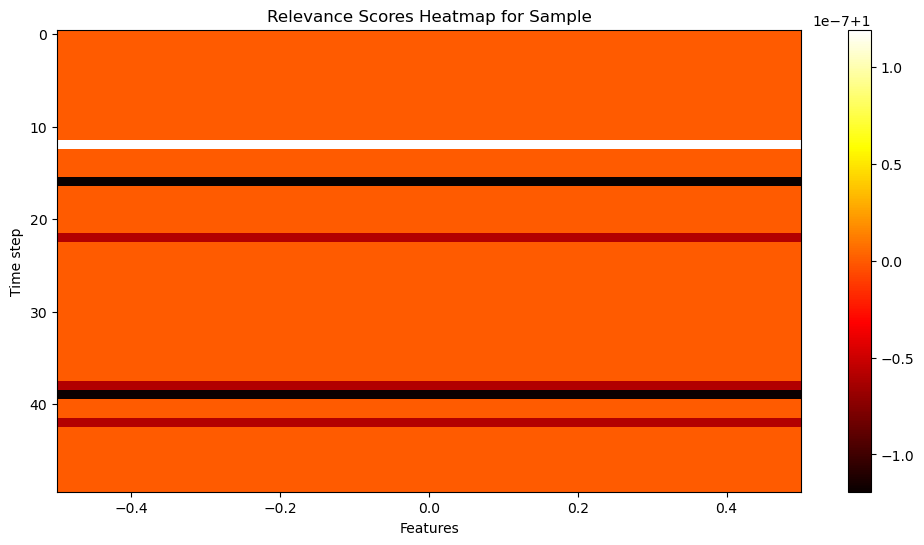

In [321]:
class LRPAttentionLayer(Layer):
    def __init__(self, **kwargs):
        super(LRPAttentionLayer, self).__init__(**kwargs)

    def call(self, inputs):
        lstm_out, attention_scores = inputs
        relevance_scores = tf.multiply(attention_scores, lstm_out) / tf.reduce_sum(attention_scores, axis=1, keepdims=True)
        return relevance_scores

class LRPRelevanceLayer(Layer):
    def __init__(self, **kwargs):
        super(LRPRelevanceLayer, self).__init__(**kwargs)

    def call(self, inputs):
        lstm_out, relevance_scores = inputs
        epsilon = 1e-10
        relevance_to_input = relevance_scores / (lstm_out + epsilon)
        return relevance_to_input

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

inputs = Input(shape=(1, X_train_reshaped.shape[2]))

lstm = LSTM(units=50, return_sequences=True)(inputs)

attention_scores = Dense(1, activation='sigmoid')(lstm)
context_vector = Dot(axes=1)([attention_scores, lstm])

relevance_scores = LRPAttentionLayer()([lstm, attention_scores])
relevance_to_input = LRPRelevanceLayer()([lstm, relevance_scores])

output_predictions = Dense(units=1, activation='sigmoid')(context_vector)

model_predictions = Model(inputs=inputs, outputs=output_predictions)

model_predictions.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_predictions.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=1)

loss, accuracy = model_predictions.evaluate(X_test_reshaped, y_test, verbose=1)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

def compute_relevance(model, X_sample, relevance_scores):
    relevance_model = Model(inputs=model.inputs, outputs=relevance_scores)
    relevance_sample = relevance_model.predict(X_sample)
    return relevance_sample

sample_index = 0
relevance_sample = compute_relevance(model_predictions, X_test_reshaped[sample_index:sample_index+1], relevance_to_input)

plt.figure(figsize=(12, 6))  
plt.imshow(relevance_sample[0].T, cmap='hot', interpolation='nearest', aspect='auto')  # Set aspect='auto' for automatic aspect ratio adjustment
plt.colorbar()
plt.xlabel('Features')
plt.ylabel('Time step')
plt.title('Relevance Scores Heatmap for Sample')
plt.show()



# RMB MODEL with LIME XAI technique

In [332]:
from sklearn.metrics import accuracy_score

discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
X_binned = discretizer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rbm = BernoulliRBM(n_components=100, learning_rate=0.01, n_iter=100, random_state=42, verbose=True)
logistic = LogisticRegression(max_iter=1000)

rbm_features_classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])

rbm_features_classifier.fit(X_scaled, y)

y_pred = rbm_features_classifier.predict(X_scaled)

accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y, y_pred))

feature_names = X.columns.tolist()

explainer = lime.lime_tabular.LimeTabularExplainer(X_scaled, feature_names=feature_names, class_names=['class_0', 'class_1'])

sample_idx = 0  
sample = X_scaled[sample_idx].reshape(1, -1)

predict_fn = lambda x: rbm_features_classifier.predict_proba(scaler.transform(x))

explanation = explainer.explain_instance(sample[0], predict_fn, num_features=len(feature_names))

explanation.show_in_notebook()

explanation.save_to_file('lime_explanation.html')

explanation_viz = explanation.as_pyplot_figure()

# Save the explanation visualization as an image
explanation_viz.savefig('lime_explanation.png')

# Close the Matplotlib figure to release resources
plt.close(explanation_viz)

coefficients = explanation.local_exp[1]  

coefficients_sorted = sorted(coefficients, key=lambda x: abs(x[1]))

feature_names_sorted = [feature_names[idx] for idx, _ in coefficients_sorted]
coefficients_sorted = [coef for _, coef in coefficients_sorted]



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


[BernoulliRBM] Iteration 1, pseudo-likelihood = -37.42, time = 0.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -54.50, time = 0.01s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -73.09, time = 0.02s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -93.97, time = 0.01s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -116.62, time = 0.01s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -141.42, time = 0.01s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -167.31, time = 0.00s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -194.41, time = 0.02s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -221.33, time = 0.02s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -248.51, time = 0.00s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -276.03, time = 0.02s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -303.85, time = 0.02s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -331.99, time = 0.00s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -359.47, time = 0.02s
[BernoulliRBM] Iter

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# GNN with Integrated Gradients method XAI techinique

Epoch [1/10], Loss: 0.7175
Epoch [2/10], Loss: 0.7114
Epoch [3/10], Loss: 0.7054
Epoch [4/10], Loss: 0.6996
Epoch [5/10], Loss: 0.6939
Epoch [6/10], Loss: 0.6884
Epoch [7/10], Loss: 0.6830
Epoch [8/10], Loss: 0.6778
Epoch [9/10], Loss: 0.6727
Epoch [10/10], Loss: 0.6678
Test Accuracy: 65.50%


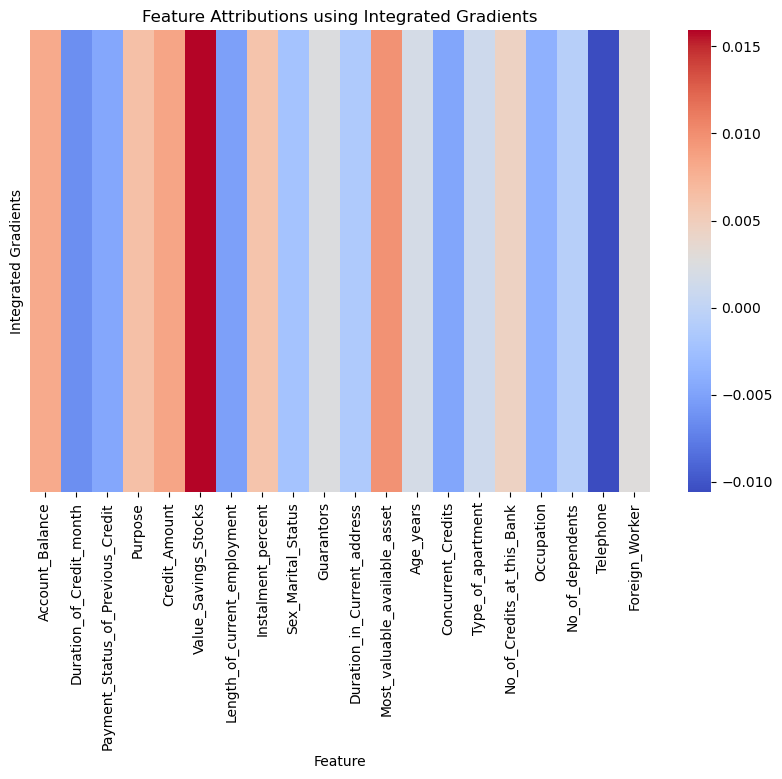

In [324]:


X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


class GNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x
    
input_dim = X_train_tensor.shape[1] 
hidden_dim = 64  
output_dim = 1  



model = GNN(input_dim, hidden_dim, output_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)  
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = torch.round(y_pred)
    accuracy = torch.sum(y_pred_class.squeeze() == y_test_tensor) / y_test_tensor.size(0)
    print(f'Test Accuracy: {accuracy.item()*100:.2f}%')

def integrated_gradients(inputs, model):
    baseline = torch.zeros_like(inputs)
    num_steps = 50
    scaled_inputs = [baseline + (float(i) / num_steps) * (inputs - baseline) for i in range(num_steps + 1)]

    total_gradients = torch.zeros_like(inputs)
    for scaled_input in scaled_inputs:
        scaled_input.requires_grad_()
        output = model(scaled_input)
        output.backward()
        total_gradients += scaled_input.grad

    avg_gradients = total_gradients / num_steps
    integrated_grads = (inputs - baseline) * avg_gradients

    return integrated_grads

sample_idx = 0  
sample = X_test_tensor[sample_idx].unsqueeze(0)  

ig = integrated_gradients(sample, model)

def visualize_integrated_gradients(ig, feature_names):
    plt.figure(figsize=(10, 6))
    sns.heatmap(ig.reshape(1, -1), cmap='coolwarm', annot=False, xticklabels=feature_names, yticklabels=False)
    plt.xlabel('Feature')
    plt.ylabel('Integrated Gradients')
    plt.title('Feature Attributions using Integrated Gradients')
    plt.show()

visualize_integrated_gradients(ig.squeeze().numpy(), feature_names[:input_dim])
